###WORKING MODEL###

In [ ]:
!pip install statsmodels==0.12.1

In [ ]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import statistics

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
from pandas.plotting import autocorrelation_plot

from statsmodels.tsa.arima.model import ARIMA

from pandas import DataFrame

In [ ]:
#series = pd.read_csv('aggregatedhour - Copy.csv')
#series = series["Total"]

In [ ]:
series = pd.read_csv('/content/allapt_allmonth - Copy (2) - Copy.csv')
series = series["Total"]

In [ ]:
j = statistics.stdev(series)

0    3104
1    2734
2    3193
3    2889
4    3099
Name: Total, dtype: int64


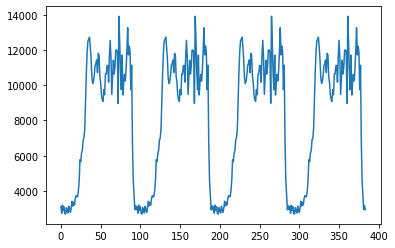

In [ ]:
print(series.head())
series.plot()
pyplot.show()

In [ ]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
X = series[0:96]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.902553
p-value: 0.330861
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584


In [ ]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
from numpy import log
X = series
X = log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.608013
p-value: 0.000125
	1%: -3.448
	5%: -2.869
	10%: -2.571


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(311)
fig = plot_acf(series, ax=ax1,
               title="Autocorrelation on Original Series") 
ax2 = fig.add_subplot(312)
fig = plot_acf(series.diff().dropna(), ax=ax2, 
               title="1st Order Differencing")
ax3 = fig.add_subplot(313)
fig = plot_acf(series.diff().diff().dropna(), ax=ax3, 
               title="2nd Order Differencing")


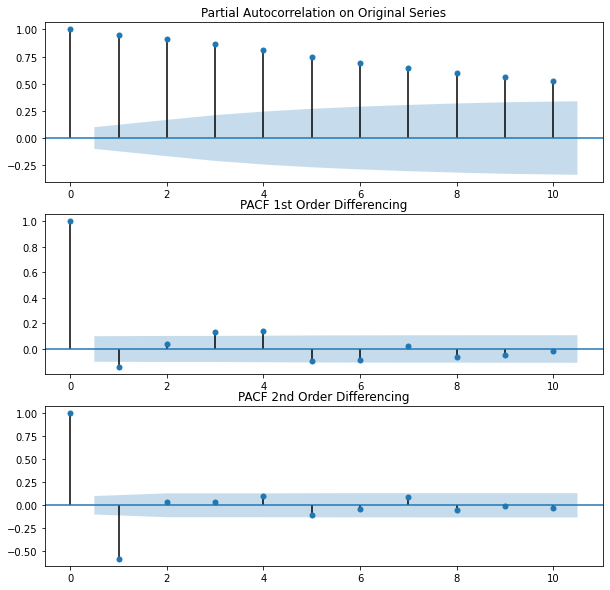

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(311)
fig = plot_acf(series, lags=10, ax=ax1,
               title="Partial Autocorrelation on Original Series") 
ax2 = fig.add_subplot(312)
fig = plot_acf(series.diff().dropna(), lags=10,  ax=ax2, 
               title="PACF 1st Order Differencing")
ax3 = fig.add_subplot(313)
fig = plot_acf(series.diff().diff().dropna(), lags=10, ax=ax3, 
               title="PACF 2nd Order Differencing")


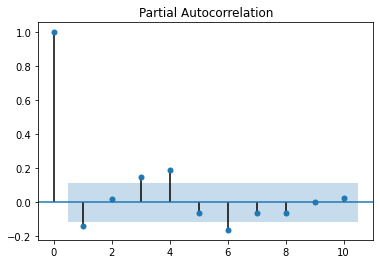

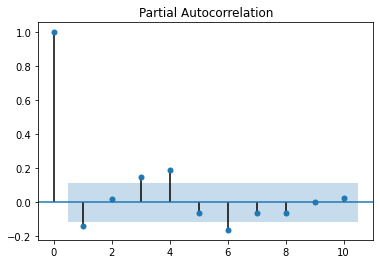

In [ ]:
plot_pacf(series.diff().dropna(), lags=10)

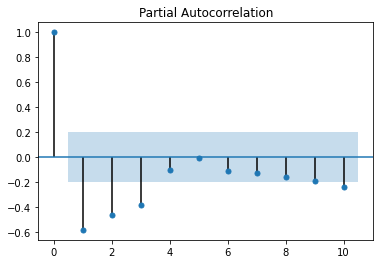

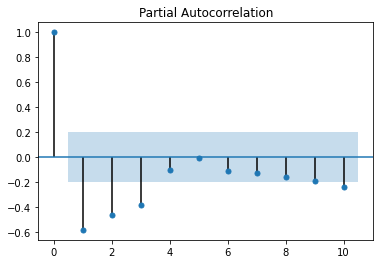

In [ ]:
plot_pacf(series.diff().diff().dropna(), lags=10)

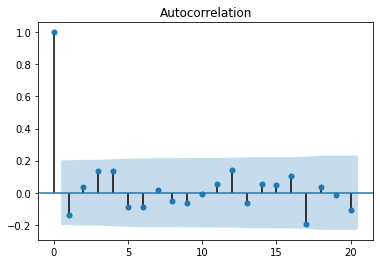

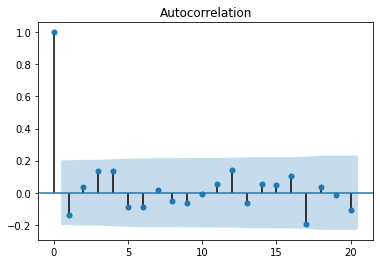

In [ ]:
plot_acf(series.diff().dropna())

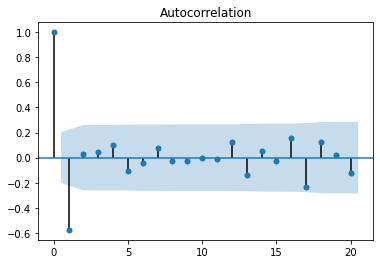

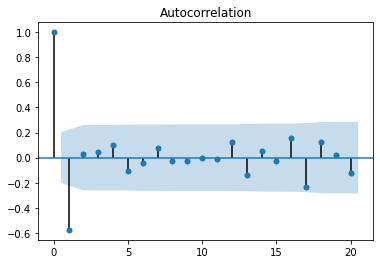

In [ ]:
plot_acf(series.diff().diff().dropna())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


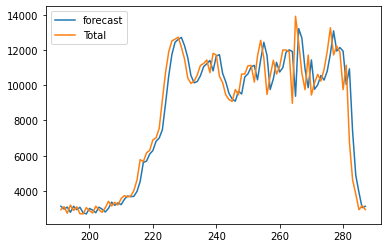

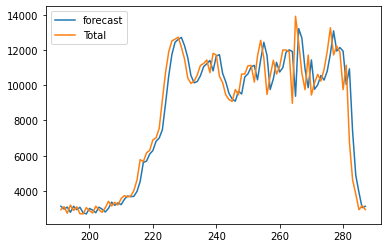

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(series, order=(1, 1, 1))
results = model.fit()
results.plot_predict(191, 287)

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Total   No. Observations:                  287
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2418.463
Method:                       css-mle   S.D. of innovations           1105.142
Date:                Sun, 17 Apr 2022   AIC                           4844.926
Time:                        12:45:32   BIC                           4859.564
Sample:                             1   HQIC                          4850.793
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2730     57.718     -0.005      0.996    -113.397     112.851
ar.L1.D.Total    -0.1901      0.259     -0.734      0.463      -0.698       0.318
ma.L1.D.Total     0.0526      0.260      0.203      0.839      -0.456       0.561
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -5.2591           +0.0000j            5.2591            0.5000
MA.1          -19.0106           +0.0000j           19.0106            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 4.3 MB/s 


###BETTER WORKING MODEL###

In [ ]:
#Import required Libraries
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from pandas import read_csv
import multiprocessing as mp

### Just to remove warnings to prettify the notebook. 
import warnings
warnings.filterwarnings("ignore")

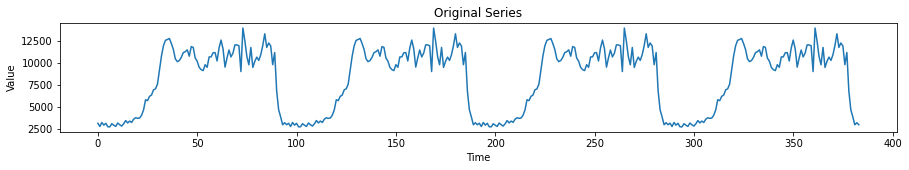

In [ ]:
# We're using a sample data from https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv
# Import data
df = series
plt.figure(figsize=(15, 2))
plt.plot(df)
plt.title('Original Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
result = adfuller(df.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.262340
p-value: 0.000516


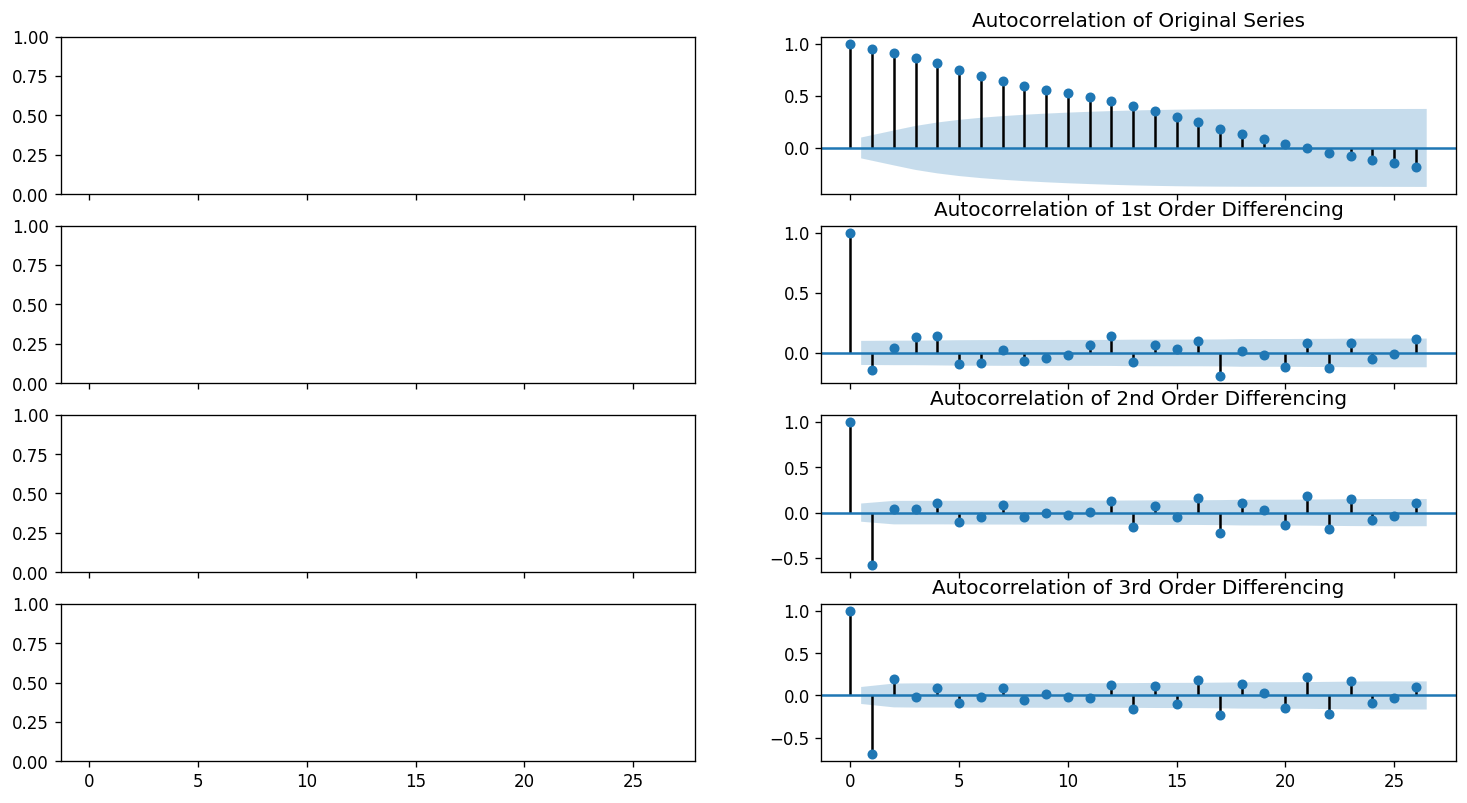

ADF Statistic for 1st Order Differencing
ADF Statistic: -4.244868
p-value: 0.000553
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571

 ADF Statistic for 2nd Order Differencing
ADF Statistic: -12.751126
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571

 ADF Statistic for 3nd Order Differencing
ADF Statistic: -10.671235
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


In [ ]:
plt.rcParams.update({'figure.figsize':(15,8), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(4, 2, sharex=True)
#axes[0, 0].plot(df); axes[0, 0].set_title('Original Series')
plot_acf(df, ax=axes[0, 1])
axes[0, 1].set_title('Autocorrelation of Original Series')

# 1st Differencing
#axes[1, 0].plot(df.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.diff().dropna(), ax=axes[1, 1]) 
axes[1, 1].set_title('Autocorrelation of 1st Order Differencing')

# 2nd Differencing
#axes[2, 0].plot(df.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.diff().diff().dropna(), ax=axes[2, 1])
axes[2, 1].set_title('Autocorrelation of 2nd Order Differencing')


#axes[3, 0].plot(df.diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(df.diff().diff().diff().dropna(), ax=axes[3, 1])
axes[3, 1].set_title('Autocorrelation of 3rd Order Differencing')
plt.show()

print('ADF Statistic for 1st Order Differencing')
result = adfuller(df.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

print('\n ADF Statistic for 2nd Order Differencing')
result = adfuller(df.diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


print('\n ADF Statistic for 3nd Order Differencing')
result = adfuller(df.diff().diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


IndexError: ignored

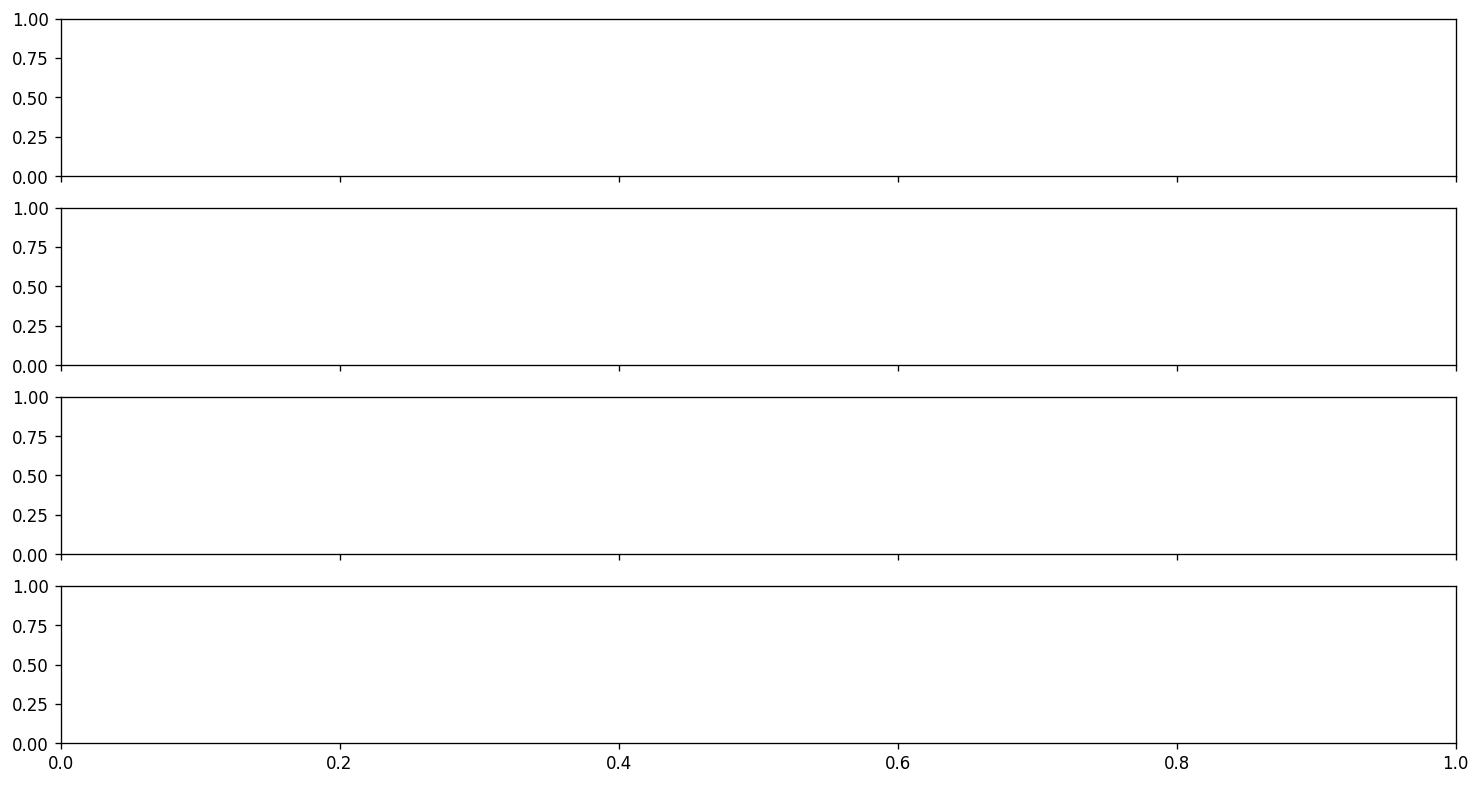

In [ ]:
plt.rcParams.update({'figure.figsize':(15,8), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(4, 1, sharex=True)
axes[0, 0].plot(df); axes[0, 0].set_title('Original Series')
plot_acf(df, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.diff().diff().dropna(), ax=axes[2, 1])

axes[3, 0].plot(df.diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(df.diff().diff().diff().dropna(), ax=axes[3, 1])
plt.show()

print('ADF Statistic for 1st Order Differencing')
result = adfuller(df.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

print('\n ADF Statistic for 2nd Order Differencing')
result = adfuller(df.diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


print('\n ADF Statistic for 3nd Order Differencing')
result = adfuller(df.diff().diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


In [ ]:
from pmdarima.arima.utils import ndiffs  
import pandas as pd  
  

X = df 
  
# Augmented Dickey Fuller Test  
adftest = ndiffs(X, test = 'adf')  
  
# KPSS Test  
kpsstest = ndiffs(X, test = 'kpss')  
  
# PP Test  
pptest = ndiffs(X, test = 'pp')  
  
print("ADF Test =", adftest)  
print("KPSS Test =", kpsstest)  
print("PP Test =", pptest)  

ModuleNotFoundError: ignored

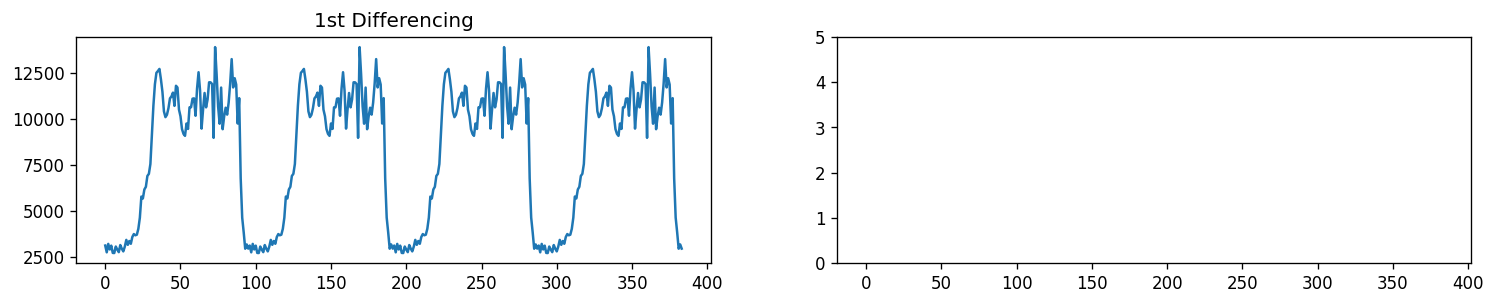

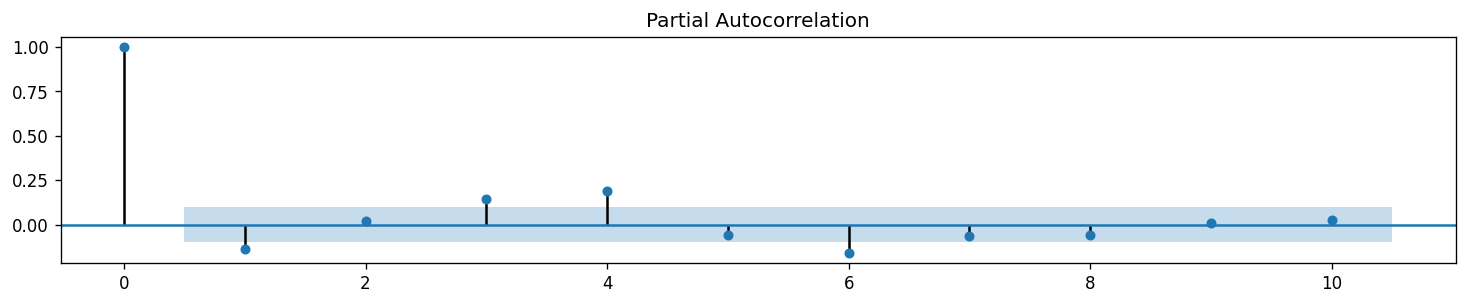

In [ ]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(15,2.5), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.diff().dropna(), lags=10)

plt.show()

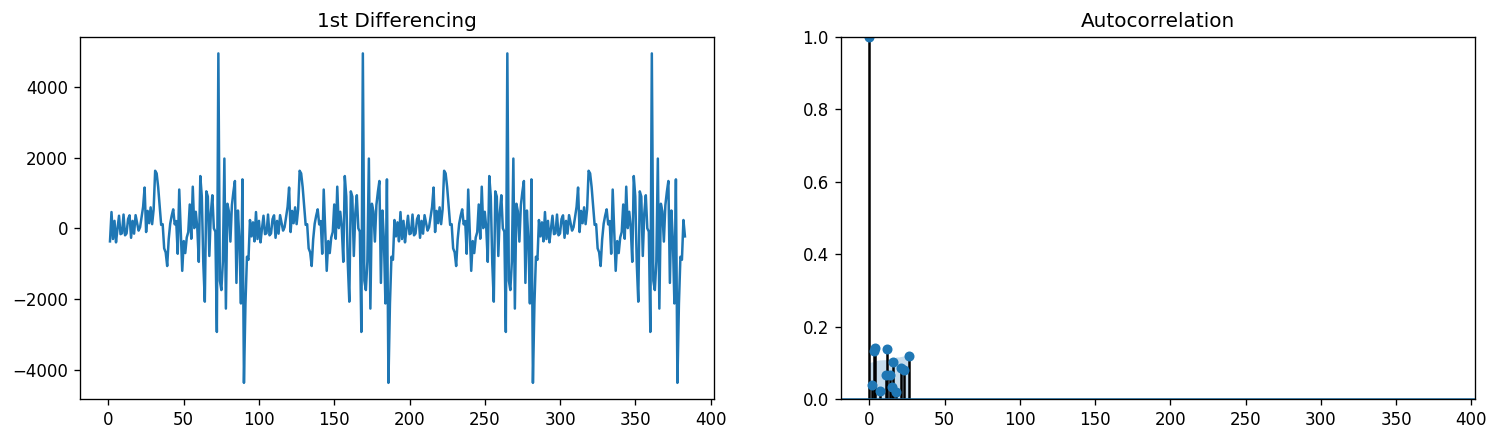

In [ ]:
# ACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(15,4), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1))
plot_acf(df.diff().dropna(), ax=axes[1])

plt.show()

In [ ]:
model = ARIMA(df.dropna(), order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

In [ ]:
x = model_fit.plot_predict(2, 95)

In [ ]:
# Plotting Residual Errors  
myresiduals = pd.DataFrame(model_fit.resid)  
fig, ax = plt.subplots(1,2)  
myresiduals.plot(title = "Residuals", ax = ax[0])  
myresiduals.plot(kind = 'kde', title = 'Density', ax = ax[1])  
plt.show()  

In [ ]:
import statsmodels.api as sm



#perform Ljung-Box test on residuals with lag=5
sm.stats.acorr_ljungbox(model_fit.resid, lags=[3], return_df=True)

,lb_stat,lb_pvalue
3,11.177557,0.010803


In [ ]:
import statsmodels.api as sm
def model_diagnostics(residuals, model_obj):
    # For Breusch-Godfrey we have to pass the results object
    godfrey = sm.stats.acorr_breusch_godfrey(model_obj, nlags= 40)
    ljung = sm.stats.acorr_ljungbox(residuals, lags= 40)
    shap = sm.stats.shapiro(residuals)
    j_bera = sm.stats.jarque_bera(residuals)
    print('Results of Ljung-Box:')
    print('Null Hypothesis: No auotcorrelation')
    print('P-Value =< Alpha(.05) => Reject Null')
    print(f'p-values: {ljung[1]}\n')
    print('Results of Breusch-Godfrey:')
    print('Null Hypothesis: No auotcorrelation')
    print('P-Value =< Alpha(.05) => Reject Null')   
    print(f'p-values: {godfrey[1]}\n')
    print('Results of Shapiro-Wilks:')
    print('Null Hypothesis: Data is normally distributed')
    print('P-Value =< Alpha(.05) => Reject Null')   
    print(f'p-value: {shap[1]}\n')
    print('Results of Jarque-Bera:')
    print('Null Hypothesis: Data is normally distributed')
    print('P-Value =< Alpha(.05) => Reject Null')   
    print(f'p-value: {j_bera[1]}')

def plot_diagnostics(residuals):
    residuals.plot(title='ARIMA Residuals', figsize=(15, 10))
    plt.show()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    ax[0].set_title('ARIMA Residuals KDE')
    ax[1].set_title('ARIMA Resduals Probability Plot')    
    residuals.plot(kind='kde', ax=ax[0])
    probplot(residuals, dist='norm', plot=ax[1])
    plt.show()  

In [ ]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(myresiduals, lags=[21], return_df=True)

,lb_stat,lb_pvalue
21,18.733359,0.60224


In [ ]:
l = model_fit.fittedvalues + df
l = np.nan_to_num(l)
l

array([    0.        ,  2733.0114172 ,  3242.62738047,  2822.82542421,
        3142.53809536,  2669.0502296 ,  2749.63781535,  3046.92200394,
        2834.62046821,  2766.90187026,  3147.84428286,  2877.13218195,
        2813.67084901,  3062.42398319,  3373.5402831 ,  3092.83536488,
        3388.92248901,  3167.46630574,  3591.10536516,  3676.23568427,
        3642.79694083,  3703.82523349,  4010.02843414,  4577.39636765,
        5692.49702027,  5513.95621148,  6180.94414812,  6234.7603137 ,
        6878.6613762 ,  6932.04545923,  7534.92329253,  9100.59797939,
       10506.98115214, 11691.31862052, 12367.90181719, 12536.16596111,
       12719.54214857, 12145.68259436, 11559.01729031, 10502.62339008,
       10241.81449257, 10265.49881723, 10566.53504074, 11073.35070837,
       11161.3707132 , 11424.27593421, 10688.67137232, 11910.32228655,
       11558.75966002, 10530.91396551, 10311.71554439,  9488.94626555,
        9282.33155378,  9111.50886468,  9767.06938837,  9365.54558708,
      

In [ ]:
df

0     3104
1     2734
2     3193
3     2889
4     3099
      ... 
91    4626
92    3821
93    2931
94    3165
95    2936
Name: Total, Length: 96, dtype: int64

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(df, l)

133.85952972568333

In [ ]:
#from sklearn.metrics import mean_squared_error
#mean_squared_error(df, l, squared=True)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df, l, squared=False)

351.79676847516714

In [ ]:
 def nmser(x,y):
        z=0
        if len(x)==len(y):
            for k in range(len(x)):
                z = z + (((x[k]-y[k])**2)/x[k])    
                z = z/(len(x))
        return z

nmser(df,l)

0.005799604495072629

In [ ]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

mape(df,l)

0.023654546660874156

In [ ]:
def cal_rmsd_numpy(coord_1, coord_2):
    rmsd = np.sqrt(((coord_1 - coord_2) ** 2).mean())    ## this would be the formula
    return rmsd

rmsd = cal_rmsd_numpy(df, l)

print(rmsd)

351.79676847516714


In [ ]:
k = l + j/3
print(k)

[ 1220.72951729  3953.7409345   4463.35689776  4043.5549415
  4363.26761266  3889.7797469   3970.36733264  4267.65152123
  4055.3499855   3987.63138755  4368.57380015  4097.86169924
  4034.40036631  4283.15350048  4594.26980039  4313.56488217
  4609.6520063   4388.19582303  4811.83488245  4896.96520156
  4863.52645813  4924.55475078  5230.75795143  5798.12588494
  6913.22653756  6734.68572877  7401.67366541  7455.48983099
  8099.39089349  8152.77497652  8755.65280982 10321.32749668
 11727.71066943 12912.04813781 13588.63133448 13756.8954784
 13940.27166586 13366.41211165 12779.7468076  11723.35290737
 11462.54400986 11486.22833452 11787.26455803 12294.08022566
 12382.10023049 12645.0054515  11909.40088961 13131.05180384
 12779.48917731 11751.6434828  11532.44506168 10709.67578284
 10503.06107107 10332.23838198 10987.79890566 10586.27510437
 11899.5372702  11697.17152408 12334.02665902 12281.62541601
 11397.21311026 13002.86166719 13561.96510718 12659.90168962
 10838.13372277 12016.2300

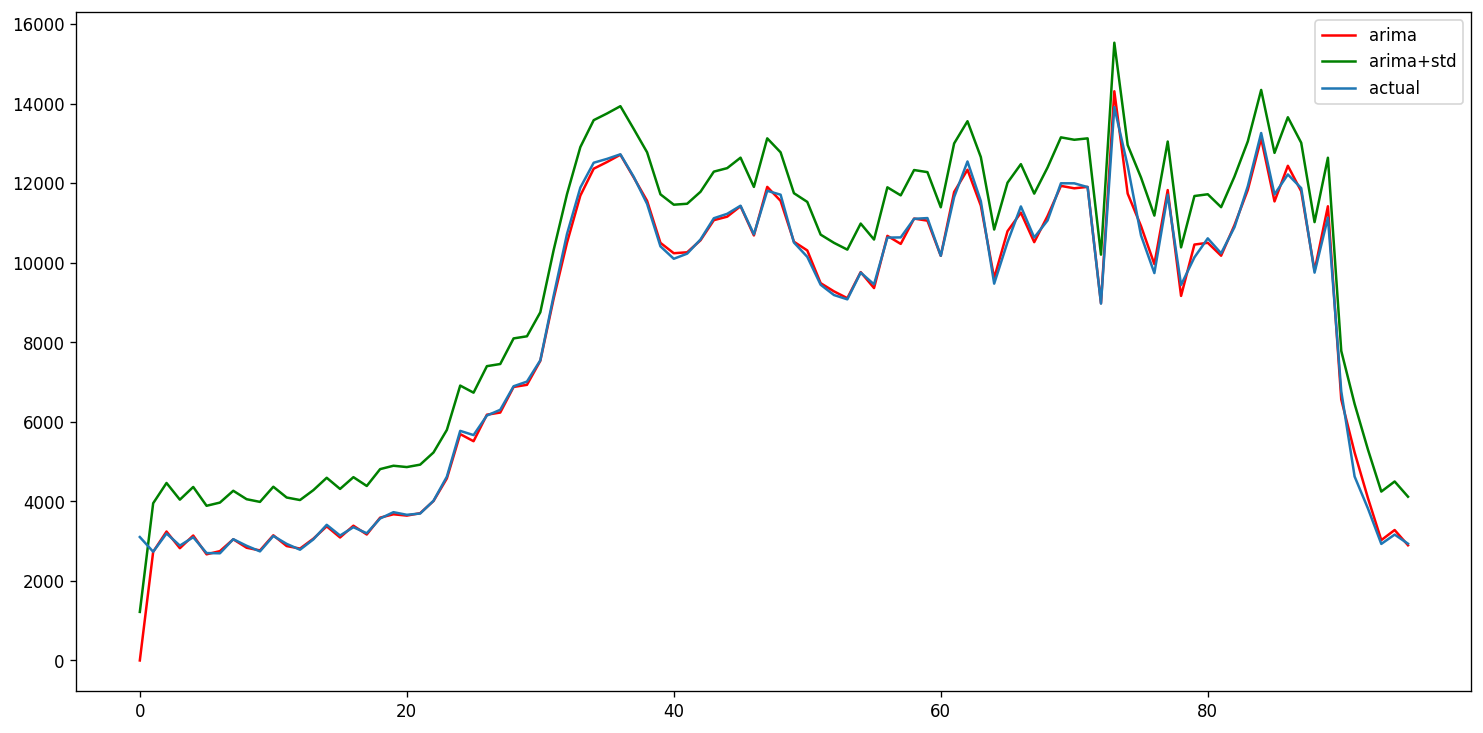

In [ ]:
p =  model_fit.fittedvalues
plt.figure(figsize=(15, 7.5))
plt.plot(l, color='r', label='arima')
plt.plot(k, color='g', label='arima+std')
plt.plot(df, label='actual')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(df, k)

1226.4293804325914

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df, k, squared=False)

1237.767079026219

In [ ]:
 def nmser(x,y):
        z=0
        if len(x)==len(y):
            for k in range(len(x)):
                z = z + (((x[k]-y[k])**2)/x[k])    
                z = z/(len(x))
        return z

nmser(df,k)

5.018185921045005

In [ ]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

mape(df,k)

0.20298633106269834

In [ ]:
model_fit = model.fit(disp=-1)
resid = model_fit.resid

model_diagnostics(resid, model_fit)
plot_diagnostics(resid)

AttributeError: ignored

In [ ]:
x = model_fit.plot_predict(2, 24)

###CODE DUMP###

In [ ]:
import pandas as pd
import pmdarima as pmd
results = pmd.auto_arima(df,
                         start_p=0,  # initial guess for AR(p)
                         start_d=0,  # initial guess for I(d)
                         start_q=0,  # initial guess for MA(q)
                         max_p=4,    # max guess for AR(p)
                         max_d=4,    # max guess for I(d)
                         max_q=4,    # max guess for MA(q)
                         m=7,        # seasonal order
                         start_P=0,  # initial guess for seasonal AR(P)
                         start_D=0,  # initial guess for seasonal I(D)
                         start_Q=0,  # initial guess for seasonal MA(Q)
                         trend='c',
                         information_criterion='aic',
                         trace=True,
                         error_action='ignore'
                         )


In [ ]:
autocorrelation_plot(series)
pyplot.show()

In [ ]:
# fit model
model = ARIMA(series, order=(1,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

In [ ]:
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())